In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('data/high_diamond_ranked_10min.csv')

In [75]:
diffcols = [c for c in df.columns if 'diff' in c.lower()]
diffcols

['blueGoldDiff', 'blueExperienceDiff', 'redGoldDiff', 'redExperienceDiff']

In [76]:
onlyBlueCols = [c for c in df.columns if 'blue' in c.lower()]
onlyBlueCols

['blueWins',
 'blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin']

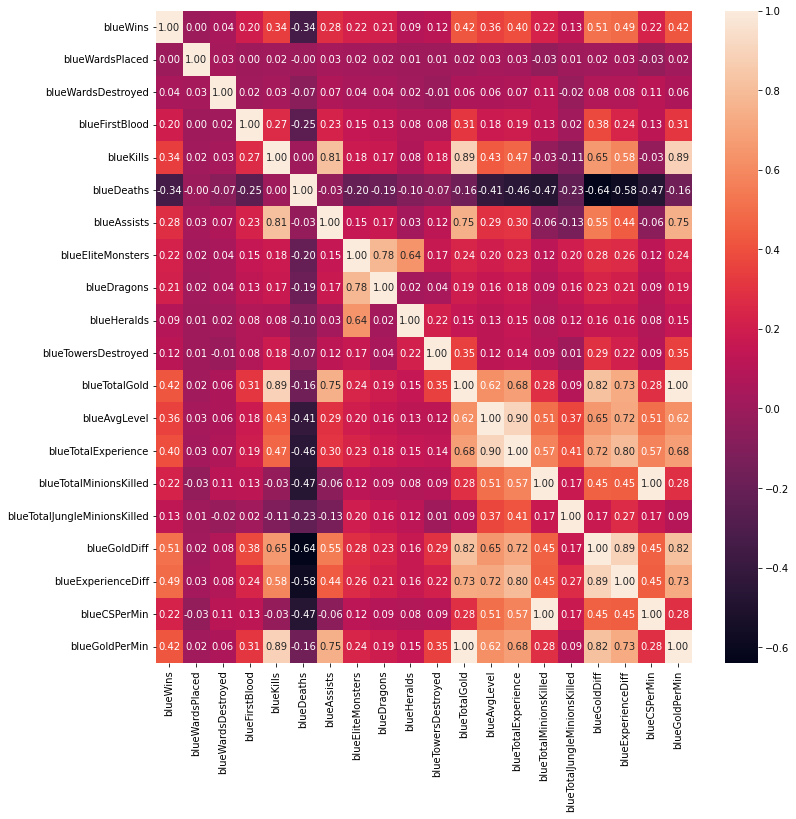

In [77]:
plt.figure(figsize=(12, 12))
sns.heatmap(df[onlyBlueCols].corr(), annot=True, fmt=".2f")
plt.show()

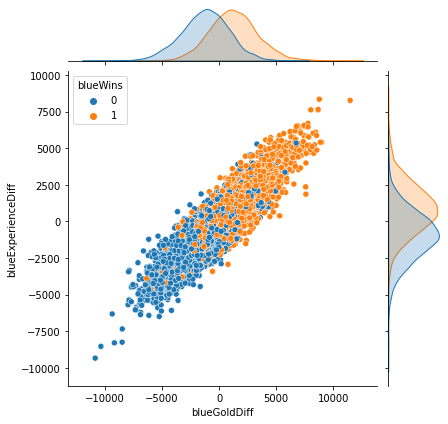

In [78]:
sns.jointplot(data=df, x="blueGoldDiff", y="blueExperienceDiff", hue="blueWins")
plt.show()

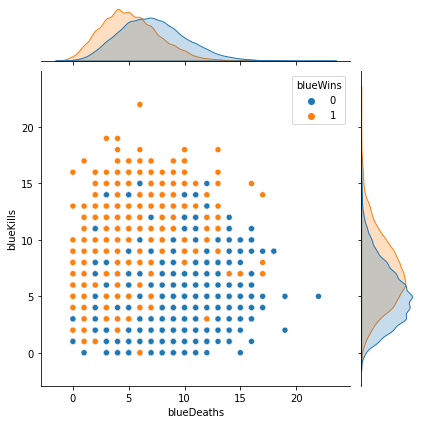

In [79]:
sns.jointplot(data=df, x="blueDeaths", y="blueKills", hue="blueWins")
plt.show()

/tmp/ipykernel_33931/1388276473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["goldDiff"] = df["blueGoldDiff"]
/tmp/ipykernel_33931/1388276473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["expDiff"] = df["blueExperienceDiff"]
/tmp/ipykernel_33931/1388276473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

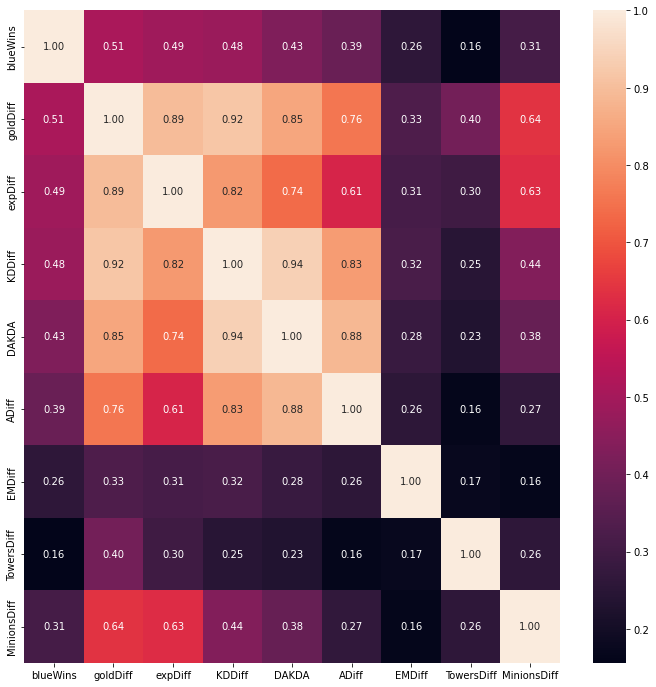

In [80]:
features = df[['blueWins']]

features["goldDiff"] = df["blueGoldDiff"]
features["expDiff"] = df["blueExperienceDiff"]
features["KDDiff"] = df["blueKills"] - df["blueDeaths"]
features["DAKDA"] = (df["blueKills"] + df["blueAssists"]) * df["redDeaths"] - (df["redKills"] + df["redAssists"]) * df["blueDeaths"]
features["ADiff"] = df["blueAssists"] - df["redAssists"]
features["EMDiff"] = df["blueEliteMonsters"] - df["redEliteMonsters"]
features["TowersDiff"] = df["blueTowersDestroyed"] - df["redTowersDestroyed"]
features["MinionsDiff"] = df["blueTotalMinionsKilled"] - df["redTotalMinionsKilled"]

plt.figure(figsize=(12, 12))
sns.heatmap(features.corr(), annot=True, fmt=".2f")
plt.show()

### Description

League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off.

The game is about

- killing:

    - enemy players

    - minions

    - monsters in the jungle (some of them are elite: Dragons, Heralds)
    
- destroying buildings of enemy team.


Every kill or structure destruction gives both gold for a player or entire team, and experience for a player such that they can gain bigger level.
Every player gets one kill (K) while finishing enemy, one death (D) while dying (most often from an enemy) and assist (A) while helping teammate with kill.

The ultimate aim of the game is to destroy enemy main building.


In [81]:
features.drop('blueWins', axis=1).values.shape

(9879, 8)

In [82]:
features['blueWins'].values.astype(int).shape

(9879,)

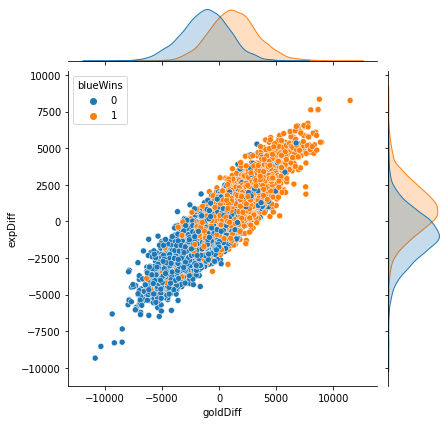

In [83]:
sns.jointplot(data=features, x="goldDiff", y="expDiff", hue="blueWins")
plt.show()

## Prior predictive check for Probit model

In [84]:
from cmdstanpy import CmdStanModel

probit_ppc = CmdStanModel(stan_file='models/probit_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [85]:
ppc_data = probit_ppc.sample(data={"N": 1000})

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [86]:
probit_ppc_df = ppc_data.draws_pd()
probit_ppc_df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_gold,beta_exp,...,expDiff_sim[991],expDiff_sim[992],expDiff_sim[993],expDiff_sim[994],expDiff_sim[995],expDiff_sim[996],expDiff_sim[997],expDiff_sim[998],expDiff_sim[999],expDiff_sim[1000]
0,-2.26199,0.787322,0.501402,3.0,7.0,0.0,5.25275,0.591513,0.524103,0.282604,...,2240.500,546.812,3237.29,-908.592,1907.960,2129.98,-1352.24,-4493.1400,983.491,-7886.660
1,-2.12745,1.000000,0.501402,2.0,3.0,0.0,2.27380,0.542853,0.520194,0.319781,...,-1953.070,-2916.500,4455.28,-4582.740,1410.200,-5190.63,5229.71,-2902.1300,1113.010,-5012.570
2,-2.84819,0.954868,0.501402,3.0,7.0,0.0,3.97606,-1.597170,1.760260,0.718198,...,-2908.140,1694.110,-5416.16,-1290.390,2038.920,1302.48,1171.01,1025.7700,-3185.440,2510.190
3,-2.86937,0.996102,0.501402,2.0,3.0,0.0,3.53312,-1.678560,1.256110,1.686700,...,-2680.160,-1106.990,-1145.02,-4198.800,-438.257,-1167.38,-1619.31,33.5174,2786.140,521.065
4,-3.44463,0.999462,0.501402,2.0,3.0,0.0,4.01063,-1.891630,1.864580,0.806643,...,-892.701,829.851,1767.84,2586.210,1925.440,-3591.38,-2350.60,-1729.6000,-3924.620,-602.148


## Posterior predictive check for Probit model

In [87]:
from cmdstanpy import CmdStanModel

probit_posterior = CmdStanModel(stan_file='models/probit_posterior.stan')

INFO:cmdstanpy:compiling stan file /home/models/probit_posterior.stan to exe file /home/models/probit_posterior
INFO:cmdstanpy:compiled model executable: /home/models/probit_posterior
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/models/probit_posterior.hpp /home/models/probit_posterior.stan
Warning in '/home/models/probit_posterior.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/models/probit_posterior.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/models/probit_posterior.stan', line 5, colu

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = features[['goldDiff', 'expDiff']]
y = features['blueWins'].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=28062023)

scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [89]:
y_train.shape

(6586,)

In [90]:
data = {
    'N': len(y_train),
    'gameWon': y_train,
    'goldDiff': X_train[:, 0],
    'expDiff': X_train[:, 1]
}

fit_probit = probit_posterior.sample(data=data, iter_warmup=100, iter_sampling=100, seed=28062023)

print(fit.summary())


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



                        Mean     MCSE  StdDev        5%        50%       95%  \
name                                                                           
lp__              -3500.0000  0.11000   1.200 -3500.000 -3500.0000 -3500.000   
alpha                -0.0027  0.00066   0.017    -0.032    -0.0021     0.022   
beta_gold             0.5900  0.00460   0.040     0.520     0.5900     0.660   
beta_exp              0.3000  0.00490   0.041     0.230     0.3000     0.370   
gameWon_rep[1]        0.5900  0.02600   0.490     0.000     1.0000     1.000   
...                      ...      ...     ...       ...        ...       ...   
gameWon_rep[6582]     0.3400  0.02900   0.470     0.000     0.0000     1.000   
gameWon_rep[6583]     0.6500  0.02200   0.480     0.000     1.0000     1.000   
gameWon_rep[6584]     0.2800  0.02100   0.450     0.000     0.0000     1.000   
gameWon_rep[6585]     0.5700  0.02700   0.500     0.000     1.0000     1.000   
gameWon_rep[6586]     0.8100  0.01900  

In [91]:
probit_posterior_df = fit.draws_pd()

In [92]:
alpha = probit_posterior_df.alpha.mean()
beta1 = probit_posterior_df.beta_gold.mean()
beta2 = probit_posterior_df.beta_exp.mean()
alpha, beta1, beta2

(-0.0026718138855, 0.5882859775, 0.303068935)

### Train accuracy

In [93]:
lin_comb = alpha + beta1 * X_train[:, 0] + beta2 * X_train[:, 1]

In [94]:
from scipy.stats import norm
probability = norm.cdf(lin_comb)
pred = [1 if p > 0.5 else 0 for p in probability]

In [95]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, pred)

0.7289705435772852

### Test accuracy 

In [96]:
X_test = scaler.transform(X_test)

In [97]:
lin_comb = alpha + beta1 * X_test[:, 0] + beta2 * X_test[:, 1]

In [98]:
probability = norm.cdf(lin_comb)
pred = [1 if p > 0.5 else 0 for p in probability]

In [99]:
accuracy_score(y_test, pred)

0.7245672638931066

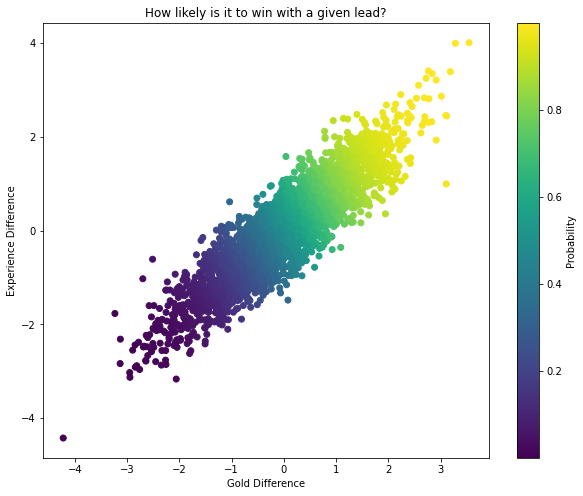

In [100]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=probability, cmap='viridis')
plt.colorbar(label='Probability')
plt.xlabel('Gold Difference')
plt.ylabel('Experience Difference')
plt.title('How likely is it to win with a given lead?')
plt.show()

In [101]:
falsePreds = (y_test != pred)

In [102]:
X_test[falsePreds, :].shape

(907, 2)

In [103]:
falseX = X_test[falsePreds, :]

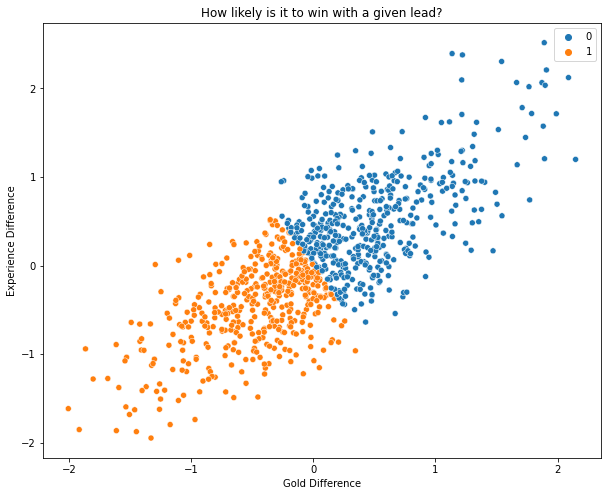

In [104]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=falseX[:, 0], y=falseX[:, 1], hue=y_test[falsePreds])
plt.xlabel('Gold Difference')
plt.ylabel('Experience Difference')
plt.title('How likely is it to win with a given lead?')
plt.show()

## Prior predictive check for Logit model

In [105]:
from cmdstanpy import CmdStanModel

logit_ppc = CmdStanModel(stan_file='models/logit_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [106]:
ppc_data = logit_ppc.sample(data={"N": 1000})

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [107]:
logit_ppc_df = ppc_data.draws_pd()
logit_ppc_df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_gold,beta_exp,...,expDiff_sim[991],expDiff_sim[992],expDiff_sim[993],expDiff_sim[994],expDiff_sim[995],expDiff_sim[996],expDiff_sim[997],expDiff_sim[998],expDiff_sim[999],expDiff_sim[1000]
0,-2.85228,0.534702,0.524372,3.0,7.0,0.0,3.54730,1.114870,0.709359,0.198674,...,1463.640,1206.05,-2790.240,-2205.3600,-171.071,-364.309,-1457.070,3028.790,1826.310,-1941.61
1,-3.84541,0.898102,0.524372,2.0,7.0,0.0,4.61867,-0.690824,0.181858,2.338990,...,-1899.780,-4012.11,-809.054,-304.9270,1002.790,1348.730,313.817,-4443.720,-548.779,3304.50
2,-1.69881,0.453537,0.524372,3.0,7.0,0.0,5.97750,-0.956451,1.293790,0.628378,...,-698.085,-4973.57,1780.150,350.6650,7376.600,3212.190,-4017.830,969.212,-4306.240,5680.68
3,-1.31439,0.993531,0.524372,3.0,7.0,0.0,2.07335,-0.321527,0.703498,1.428320,...,400.354,-2849.29,-4525.240,3067.5300,3906.280,-151.659,2124.700,-1340.380,1902.580,-2771.57
4,-3.14100,0.982342,0.524372,3.0,7.0,0.0,3.69889,1.062590,0.140742,0.694502,...,-995.735,-2853.36,1093.880,-17.7409,-1109.240,4439.490,-1845.420,1436.530,2522.400,5523.90


## Posterior predictive check for Logit model

In [108]:
from cmdstanpy import CmdStanModel

logit_posterior = CmdStanModel(stan_file='models/probit_posterior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = features[['goldDiff', 'expDiff']]
y = features['blueWins'].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=28062023)

scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [110]:
data = {
    'N': len(y_train),
    'gameWon': y_train,
    'goldDiff': X_train[:, 0],
    'expDiff': X_train[:, 1]
}

fit_logit = logit_posterior.sample(data=data, iter_warmup=100, iter_sampling=100, seed=28062023)

print(fit.summary())

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



                        Mean     MCSE  StdDev        5%        50%       95%  \
name                                                                           
lp__              -3500.0000  0.11000   1.200 -3500.000 -3500.0000 -3500.000   
alpha                -0.0027  0.00066   0.017    -0.032    -0.0021     0.022   
beta_gold             0.5900  0.00460   0.040     0.520     0.5900     0.660   
beta_exp              0.3000  0.00490   0.041     0.230     0.3000     0.370   
gameWon_rep[1]        0.5900  0.02600   0.490     0.000     1.0000     1.000   
...                      ...      ...     ...       ...        ...       ...   
gameWon_rep[6582]     0.3400  0.02900   0.470     0.000     0.0000     1.000   
gameWon_rep[6583]     0.6500  0.02200   0.480     0.000     1.0000     1.000   
gameWon_rep[6584]     0.2800  0.02100   0.450     0.000     0.0000     1.000   
gameWon_rep[6585]     0.5700  0.02700   0.500     0.000     1.0000     1.000   
gameWon_rep[6586]     0.8100  0.01900  

In [111]:
logit_posterior_df = fit.draws_pd()

In [112]:
logit_posterior_df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_gold,beta_exp,...,gameWon_rep[6577],gameWon_rep[6578],gameWon_rep[6579],gameWon_rep[6580],gameWon_rep[6581],gameWon_rep[6582],gameWon_rep[6583],gameWon_rep[6584],gameWon_rep[6585],gameWon_rep[6586]
0,-3532.61,0.920288,0.01844,2.0,7.0,0.0,3534.08,-0.016465,0.621153,0.288567,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,-3532.09,0.985403,0.01844,3.0,15.0,0.0,3533.21,-0.007211,0.569681,0.307073,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,-3531.95,0.990784,0.01844,3.0,7.0,0.0,3532.24,0.000853,0.577456,0.305932,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-3533.00,0.730198,0.01844,3.0,7.0,0.0,3534.30,-0.017344,0.567144,0.293922,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,-3533.43,0.874644,0.01844,1.0,1.0,0.0,3533.55,-0.025457,0.567150,0.294732,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [113]:
alpha = logit_posterior_df.alpha.mean()
beta1 = logit_posterior_df.beta_gold.mean()
beta2 = logit_posterior_df.beta_exp.mean()
alpha, beta1, beta2

(-0.0026718138855, 0.5882859775, 0.303068935)

In [114]:
X_test = scaler.transform(X_test)

In [115]:
import numpy as np

In [116]:
def logit(alpha, beta_gold, beta_exp, gold_diff, exp_diff):
    eta = alpha + beta_gold * gold_diff + beta_exp * exp_diff
    p = 1 / (1 + np.exp(-eta))
    return p > 0.5

In [117]:
pred = logit(alpha, beta1, beta2, X_test[:, 0], X_test[:, 1])
pred.shape

(3293,)

In [118]:
accuracy_score(y_test, pred)

0.7245672638931066

## Model comparison

In [119]:
import arviz as az

In [120]:
idata_probit = az.from_cmdstanpy(posterior=fit_probit)
idata_logit = az.from_cmdstanpy(posterior=fit_logit)

In [121]:
idata_probit

Inference data with groups:
	> posterior
	> sample_stats

In [122]:
model_dict = {"Probit model": idata_probit, "Logit model": idata_logit}
model_comparison = az.compare(model_dict, ic="loo", scale="deviance")
print(model_comparison)

TypeError: Encountered error in ic computation of compare.

In [ ]:
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()

In [ ]:
model_comparison = az.compare(model_dict, ic="waic", scale="deviance")
print(model_comparison)

In [ ]:
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()